# Download Today's Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from pathlib import Path
from src.pollen_forecast.copernicus import PollenForcastCopernicusGeneric

In [3]:
today = pd.Timestamp.today().strftime("%Y-%m-%d")
today

'2024-06-02'

In [4]:
api_wrapper = PollenForcastCopernicusGeneric(start=today)
filename = api_wrapper.get_pollen_data()
filename

2024-06-02 13:46:16,968 INFO Welcome to the CDS
2024-06-02 13:46:16,994 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-europe-air-quality-forecasts
2024-06-02 13:46:17,036 INFO Request is queued
2024-06-02 13:46:18,071 INFO Request is running
2024-06-02 13:46:38,034 INFO Request is completed
2024-06-02 13:46:38,035 INFO Downloading https://download-0000-ads-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/adaptor.cams_regional_fc.retrieve-1717335991.624955-12225-13-8a4e802e-6829-4bfd-b6fe-8efb84eec3fc.nc to ./grass_pollen_2024-06-02_2024-06-02.nc (2.3K)
2024-06-02 13:46:38,197 INFO Download rate 14.5K/s


'./grass_pollen_2024-06-02_2024-06-02.nc'

In [5]:
ds_today = xr.open_dataset(filename)
ds_today

<xarray.Dataset> Size: 2kB
Dimensions:    (longitude: 2, latitude: 1, level: 1, time: 96)
Coordinates:
  * longitude  (longitude) float32 8B 4.75 4.85
  * latitude   (latitude) float32 4B 45.75
  * level      (level) float32 4B 0.0
  * time       (time) timedelta64[ns] 768B 00:00:00 01:00:00 ... 3 days 23:00:00
Data variables:
    gpg_conc   (time, level, latitude, longitude) float32 768B ...
Attributes:
    title:        GRASSPOLLEN Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20240602+[0H_95H]
    summary:      ENSEMBLE model hourly FORECAST of GRASSPOLLEN concentration...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

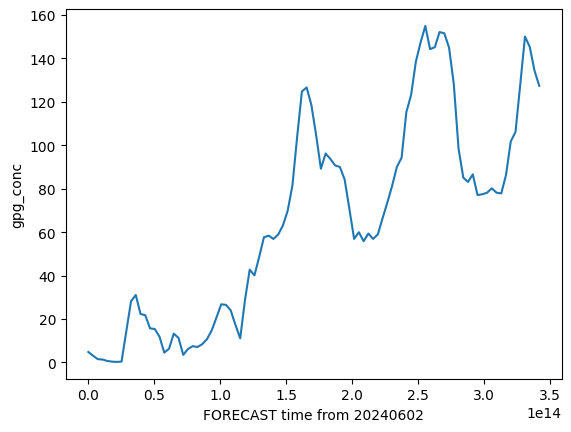

In [11]:
ds_today["gpg_conc"].mean(["longitude", "latitude", "level"]).plot()

# Download 2023 historical forcasts

In [12]:
api_wrapper_2023 = PollenForcastCopernicusGeneric(
    start="2023-03-01", end="2023-09-30", leadtime_hour=[str(i) for i in range(0, 24)]
)
api_wrapper_2023.c.sleep_max = (
    10  # reduce the sleep time to 10 seconds for this long request
)

Available variables are

- 'alder_pollen'
- 'ammonia'
- 'birch_pollen'
- 'carbon_monoxide'
- 'dust'
- 'formaldehyde'
- 'glyoxal'
- 'grass_pollen'
- 'mugwort_pollen'
- 'nitrogen_dioxide'
- 'nitrogen_monoxide'
- 'non_methane_vocs'
- 'olive_pollen'
- 'ozone'
- 'particulate_matter_10um'
- 'particulate_matter_2.5um'
- 'peroxyacyl_nitrates'
- 'pm10_sea_salt_dry'
- 'pm10_wildfires'
- 'pm2.5_total_organic_matter'
- 'ragweed_pollen'
- 'residential_elementary_carbon'
- 'secondary_inorganic_aerosol'
- 'sulphur_dioxide'
- 'total_elementary_carbon',


In [15]:
if Path(api_wrapper_2023.filename).exists():
    print("File already exists")
else:
    api_wrapper_2023.get_pollen_data()

File already exists


In [19]:
filename_2023 = "./2023_previsions_history.nc"
filename_2024 = filename

In [16]:
ds_2023 = xr.open_dataset(api_wrapper_2023.filename)
ds_2023

<xarray.Dataset> Size: 79kB
Dimensions:    (longitude: 2, latitude: 1, level: 1, time: 4922)
Coordinates:
  * longitude  (longitude) float32 8B 4.75 4.85
  * latitude   (latitude) float32 4B 45.75
  * level      (level) float32 4B 0.0
  * time       (time) timedelta64[ns] 39kB 00:00:00 ... 213 days 22:00:00
Data variables:
    gpg_conc   (time, level, latitude, longitude) float32 39kB ...
Attributes:
    title:        GRASSPOLLEN Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20230301-20230930+[0H_22H]
    summary:      ENSEMBLE model hourly FORECAST of GRASSPOLLEN concentration...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

In [18]:
mean_gpg_2023 = ds_2023.mean(
    dim=["latitude", "longitude", "level"]
).gpg_conc.to_dataframe()
start_date = "2023-03-01"
mean_gpg_2023.index += pd.Timestamp(api_wrapper_2023.date_start)

<Axes: xlabel='time'>

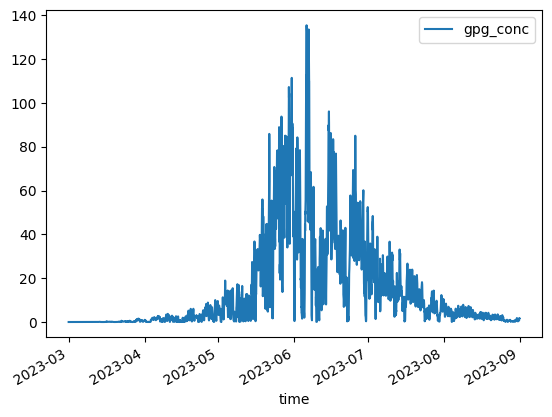

In [19]:
mean_gpg_2023.plot()

In [20]:
ds_2024 = ds_today
mean_gpg_2024 = ds_2024.mean(
    dim=["latitude", "longitude", "level"]
).gpg_conc.to_dataframe()
start_date = "2024-05-26"
mean_gpg_2024.index += pd.Timestamp(start_date)
mean_gpg_2024_in_2023 = mean_gpg_2024.copy()
mean_gpg_2024_in_2023.index = mean_gpg_2024.index - pd.DateOffset(years=1)

<Axes: xlabel='time'>

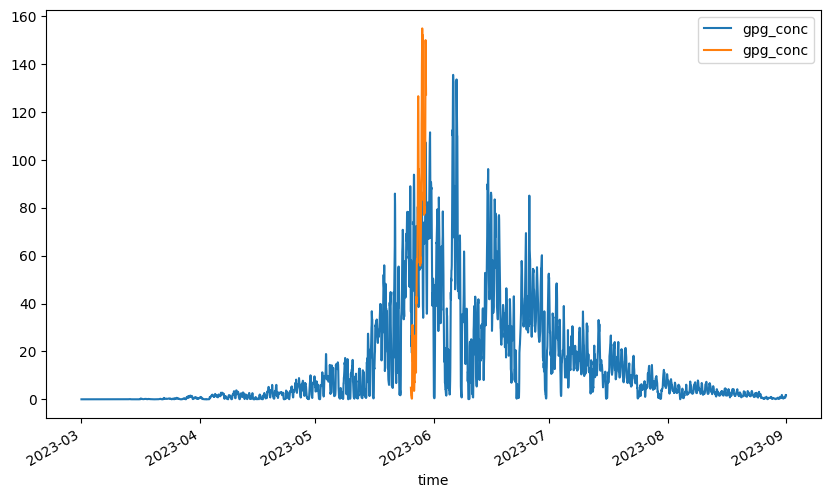

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
mean_gpg_2023.plot(ax=ax, label="2023")
mean_gpg_2024_in_2023.plot(ax=ax, label="2024")

In [10]:
mean_gpg_2024_in_2023

,gpg_conc
time,
2023-05-26 00:00:00,114.715027
2023-05-26 01:00:00,101.935577
2023-05-26 02:00:00,96.485657
2023-05-26 03:00:00,92.211205
2023-05-26 04:00:00,82.079613
2023-05-26 05:00:00,75.430229
2023-05-26 06:00:00,46.064713
2023-05-26 07:00:00,55.985382
2023-05-26 08:00:00,61.319000
